# EXERCISES 

# ex1) Dato il seguente dataframe di transazioni di vendita


In [3]:
import pandas as pd
import numpy as np

data = {
    "date": [
        "2023-05-01", "2023-05-02",
        "2023-05-05", "2023-05-07",
        "2023-05-10", "2023-05-15",
        "2023-05-20", "2023-05-25",
        "2023-05-30", "2023-05-31"
    ],
    "sales_amount": [100, 150, 200, 130, 180, 250, 300, 220, 270, 310]
}

df = pd.DataFrame(data)
df

,date,sales_amount
0,2023-05-01,100
1,2023-05-02,150
2,2023-05-05,200
3,2023-05-07,130
4,2023-05-10,180
5,2023-05-15,250
6,2023-05-20,300
7,2023-05-25,220
8,2023-05-30,270
9,2023-05-31,310


1 - crea una nuova colonna con il numero di giorni trascorsi dalle ultime vendite

2 - aggiungi le date mancanti, riempiendo i valori mancanti per sales_amount con 0

3 - crea una nuova colonna con l'importo della vendita di 7 giorni prima

4 - crea una nuova colonna con l'importo medio delle vendite dei 7 giorni precedenti

5 - converti la frequenza in settimanale, sommando le vendite per ogni settimana

In [4]:
df['date'] = pd.to_datetime(df['date'])  # Converto la colonna 'date' in formato datetime

# 1

In [8]:
# --- 1. Aggiungere una colonna con il numero di giorni trascorsi dalle ultime vendite
df['days_since_last_sale'] = (df['date'].max() - df['date']).dt.days
df


,date,sales_amount,days_since_last_sale
0,2023-05-01,100,30
1,2023-05-02,150,29
2,2023-05-05,200,26
3,2023-05-07,130,24
4,2023-05-10,180,21
5,2023-05-15,250,16
6,2023-05-20,300,11
7,2023-05-25,220,6
8,2023-05-30,270,1
9,2023-05-31,310,0


# 2

In [12]:
# --- 2. Aggiungere le date mancanti e riempire con 0 i valori di sales_amount per queste date
# Creo una serie di tutte le date tra la prima e l'ultima data
all_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Creo un nuovo DataFrame con tutte le date e uniamo con il DataFrame originale
df_full = pd.DataFrame({'date': all_dates})
df_full = df_full.merge(df, on='date', how='left').fillna({'sales_amount': 0})  # Riempie i valori mancanti con 0
df_full

,date,sales_amount,days_since_last_sale
0,2023-05-01,100.0,30.0
1,2023-05-02,150.0,29.0
2,2023-05-03,0.0,NaN
3,2023-05-04,0.0,NaN
4,2023-05-05,200.0,26.0
5,2023-05-06,0.0,NaN
6,2023-05-07,130.0,24.0
7,2023-05-08,0.0,NaN
8,2023-05-09,0.0,NaN
9,2023-05-10,180.0,21.0


# 3

In [14]:
# --- 3. Creare una colonna con l'importo delle vendite di 7 giorni prima
df_full['sales_7_days_ago'] = df_full['sales_amount'].shift(7, fill_value=0)
df_full

,date,sales_amount,days_since_last_sale,sales_7_days_ago
0,2023-05-01,100.0,30.0,0.0
1,2023-05-02,150.0,29.0,0.0
2,2023-05-03,0.0,NaN,0.0
3,2023-05-04,0.0,NaN,0.0
4,2023-05-05,200.0,26.0,0.0
5,2023-05-06,0.0,NaN,0.0
6,2023-05-07,130.0,24.0,0.0
7,2023-05-08,0.0,NaN,100.0
8,2023-05-09,0.0,NaN,150.0
9,2023-05-10,180.0,21.0,0.0


# 4 


In [15]:
# --- 4. Creare una colonna con l'importo medio delle vendite dei 7 giorni precedenti
df_full['avg_sales_7_days'] = df_full['sales_amount'].rolling(window=7, min_periods=1).mean()

In [16]:
df_full

,date,sales_amount,days_since_last_sale,sales_7_days_ago,avg_sales_7_days
0,2023-05-01,100.0,30.0,0.0,100.000000
1,2023-05-02,150.0,29.0,0.0,125.000000
2,2023-05-03,0.0,NaN,0.0,83.333333
3,2023-05-04,0.0,NaN,0.0,62.500000
4,2023-05-05,200.0,26.0,0.0,90.000000
5,2023-05-06,0.0,NaN,0.0,75.000000
6,2023-05-07,130.0,24.0,0.0,82.857143
7,2023-05-08,0.0,NaN,100.0,68.571429
8,2023-05-09,0.0,NaN,150.0,47.142857
9,2023-05-10,180.0,21.0,0.0,72.857143


In [17]:
# --- 5. Convertire la frequenza in settimanale, sommando le vendite per ogni settimana
df_full.set_index('date', inplace=True)
df_weekly = df_full.resample('W').agg({'sales_amount': 'sum'})  # Somma delle vendite per ogni settimana
df_weekly

,sales_amount
date,
2023-05-07,580.0
2023-05-14,180.0
2023-05-21,550.0
2023-05-28,220.0
2023-06-04,580.0


In [18]:
# Visualizzare i risultati
print(df_full.head(15))  # Mostra i primi 15 record del DataFrame con tutte le operazioni
print(df_weekly)  # Mostra la somma settimanale delle vendite


            sales_amount  days_since_last_sale  sales_7_days_ago  \
date                                                               
2023-05-01         100.0                  30.0               0.0   
2023-05-02         150.0                  29.0               0.0   
2023-05-03           0.0                   NaN               0.0   
2023-05-04           0.0                   NaN               0.0   
2023-05-05         200.0                  26.0               0.0   
2023-05-06           0.0                   NaN               0.0   
2023-05-07         130.0                  24.0               0.0   
2023-05-08           0.0                   NaN             100.0   
2023-05-09           0.0                   NaN             150.0   
2023-05-10         180.0                  21.0               0.0   
2023-05-11           0.0                   NaN               0.0   
2023-05-12           0.0                   NaN             200.0   
2023-05-13           0.0                   NaN  

# ex2) Given the following sales data

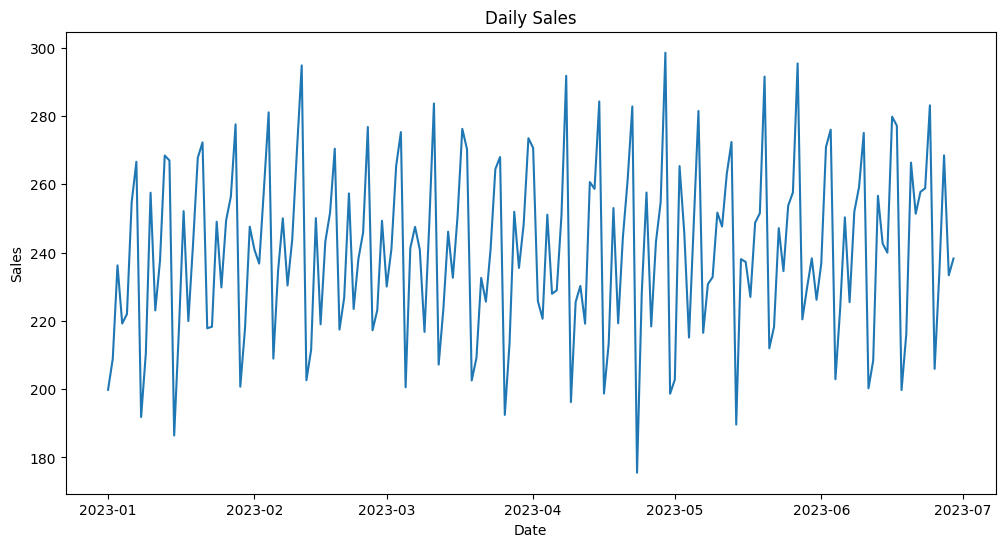

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

date_range = pd.date_range(start="2023-01-01", periods=180, freq="D")
values = np.array([200, 220, 250, 230, 240, 260, 280], dtype=float)
sales = np.tile(values, len(date_range) // 7 + 1)[:len(date_range)]
sales += np.random.normal(0, 10, len(sales))
df = pd.DataFrame({"date": date_range, "sales": sales})
df.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales")
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

### Utilizzare il modello di Smoothing esponenziale appropriato per prevedere le vendite per i 7 giorni successivi.
### Bonus: tracciare i dati storici e la previsione generata.

C:\Users\fmonc\AIBOOTCAMP-datascience\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


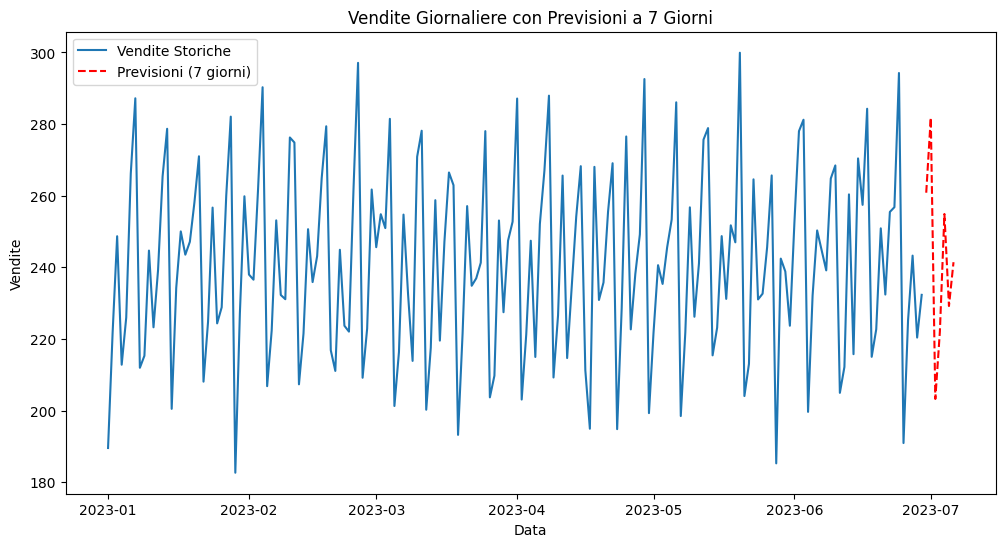

Previsioni per i prossimi 7 giorni:
2023-06-30    260.834670
2023-07-01    281.773595
2023-07-02    203.252505
2023-07-03    222.049335
2023-07-04    254.894674
2023-07-05    229.200565
2023-07-06    241.434828
Freq: D, dtype: float64


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Applicazione del modello Holt-Winters con stagionalità settimanale
model = ExponentialSmoothing(df['sales'], trend='add', seasonal='add', seasonal_periods=7)
hw_fit = model.fit()

# Previsioni per i prossimi 7 giorni
forecast = hw_fit.forecast(steps=7)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales", label='Vendite Storiche')
plt.plot(pd.date_range(df.index[-1], periods=8, freq='D')[1:], forecast, label='Previsioni (7 giorni)', linestyle='--', color='red')
plt.title("Vendite Giornaliere con Previsioni a 7 Giorni")
plt.xlabel("Data")
plt.ylabel("Vendite")
plt.legend()
plt.show()

# Stampiamo le previsioni
print(f"Previsioni per i prossimi 7 giorni:\n{forecast}")
